# LINKS
how UTM Projection works: https://gisgeography.com/utm-universal-transverse-mercator-projection/ <br>
introduction to CRS and UTM : https://www.youtube.com/watch?v=HnWNhyxyUHg <br>
sf package : https://cran.r-project.org/web/packages/sf/sf.pdf <br>
raster package : https://cran.r-project.org/web/packages/raster/raster.pdf <br>
spatial data in R : https://edzer.github.io/UseR2017/ <br>

In [1]:
#install.packages("sf")
#install.packages("raster")
#install.packages("spData")
#devtools::install_github("Nowosad/spDataLarge")
#install.packages("geojsonio")

In [106]:
library(sf)          # classes and functions for vector data
library(raster)      # classes and functions for raster data
library(spData)      # load geographic data
library(spDataLarge) # load larger geographic data
require(osmdata)
library(geojsonio)
library(repr)

<font size=5>Spatial data have spatial reference:</font>
<font size=3>
<ul>
    <li>coordinate values (e.g. XY, XYZ) </li>
    <li>a system of reference for these coordinates (e.g. WGS84)</li>
</ul>

All spatial data consist of <b>positional information</b>, answering the question <i>‘where is it?’</i>.<br>
In many applications these will be extended by <b>attributes</b>, answering the question <i>‘what is where?’</i>


<font size=5>Spatial data models:</font>
<font size=3>
<ul>
    <p style="text-decoration:underline;"><font size=4 color="magenta">Vector data models</font></p>
    <li><b>Point</b>: a single point location, such as a GPS reading or a geocoded address</li>
    <li><b>Line</b>: a set of ordered points, connected by straight line segments</li>
    <li><b>Polygon</b>: an area, marked by one or more enclosing lines, possibly containing holes, with no lines intersecting</li>
    <p style="text-decoration:underline;"><font size=4 color="magenta">Raster data model</font></p>
    <li><b>Grid</b>: a collection of points or rectangular cells, organised in a regular lattice</li>
</ul>

# An introduction to simple features
<br>

<!-- ![alt text](../artwork/sf-classes.png "Title") -->
<img src="../../../artwork/sf-classes.png" style="float: left; width: 40%; margin-right: 8%; margin-bottom: 0.5em;" />

<font size=4>
<br>
Simple features is an open standard developed and endorsed by the <a href="https://www.opengeospatial.org">Open Geospatial Consortium (OGC)</a>, a not-for-profit organization.<br>
Simple Features (<b>SF</b>) is a hierarchical data model that represents a wide range of geometry types.<br>
Of 17 geometry types supported by the specification, only 7 are used in the vast majority of geographic research (see Figure below); these core geometry types are fully supported by the R package <i>sf</i>.<br>


Geometries are the basic building blocks of simple features.
Simple features in R can take on one of the 17 geometry types supported by the sf package.
We will focus on the seven most commonly used types: POINT, LINESTRING, POLYGON, MULTIPOINT, MULTILINESTRING, MULTIPOLYGON and GEOMETRYCOLLECTION.

Find the whole list of possible feature types in the <a href="http://postgis.net/docs/using_postgis_dbmanagement.html">PostGIS manual</a>.

The basis for each geometry type is the point.<br>
A point is simply a coordinate in 2D, 3D or 4D space, from which the 7 geometry types can be derived:
<ul>
    <li>POINT (5 2)</li>
    <li>LINESTRING (1 5, 4 4, 4 1, 2 2, 3 2)</li>
    <li>POLYGON ((1 5, 2 2, 4 1, 4 4, 1 5))</li>
    <li>MULTIPOINT (5 2, 1 3, 3 4, 3 2)</li>
    <li>MULTILINESTRING ((1 5, 4 4, 4 1, 2 2, 3 2), (1 2, 2 4))</li>
    <li>MULTIPOLYGON (((1 5, 2 2, 4 1, 4 4, 1 5), (0 2, 1 2, 1 3, 0 3, 0 2)))</li>
    <li>GEOMETRYCOLLECTION (MULTIPOINT (5 2, 1 3, 3 4, 3 2), LINESTRING (1 5, 4 4, 4 1, 2 2, 3 2))</li>
</ul>

### Why simple features?
Because it is a widely supported data model that underlies data structures in many GIS applications including QGIS and PostGIS.<br>
A major advantage of this is that using the data model ensures your work is cross-transferable to other set-ups, for example importing from and exporting to spatial databases.

In [13]:
vignette(package = "sf") # see which vignettes are available
vignette("sf1")          # an introduction to the package

starting httpd help server ... done


## Simple feature geometries (sfg)
<br>

|Type|R sf function|
|---------|-----------|
|A point:| <font size=4 color="green">st_point( )</font>|
|A linestring:| <font size=4 color="green">st_linestring( )</font>|
|A polygon:| <font size=4 color="green">st_polygon( )</font>|
|A multipoint:| <font size=4 color="green">st_multipoint( )</font>|
|A multilinestring:| <font size=4 color="green">st_multilinestring( )</font>|
|A multipolygon:| <font size=4 color="green">st_multipolygon( )</font>|
|A geometry collection:| <font size=4 color="green">st_geometrycollection( )</font>|

<hr>

## Simple feature geometries (sfg)
<ul>
    <li>A point:               <b><font size=4 color="green">st_point( )</font></b></li>
    <li>A linestring:          <b><font size=4 color="green">st_linestring( )</font></b></li>
    <li>A polygon:             <b><font size=4 color="green">st_polygon( )</font></b></li>
    <li>A multipoint:          <b><font size=4 color="green">st_multipoint( )</font></b></li>
    <li>A multilinestring:     <b><font size=4 color="green">st_multilinestring( )</font></b></li>
    <li>A multipolygon:        <b><font size=4 color="green">st_multipolygon( )</font></b></li>
    <li>A geometry collection: <b><font size=4 color="green">st_geometrycollection( )</font></b></li>
</ul>
<hr>

<b>sfg</b> objects can be created from three base R data types:
<ol>
<li>A numeric vector: a single point</li>
<li>A matrix: a set of points, where each row represents a point, a multipoint or linestring</li>
<li>A list: a collection of objects such as matrices, multilinestrings or geometry collections</li>
</ol>

In [14]:
options(repr.plot.width=3, repr.plot.height=3)

Warning message:
“package ‘repr’ was built under R version 3.4.4”

### POINT

[1] "XY"    "POINT" "sfg"

POINT (5 2)


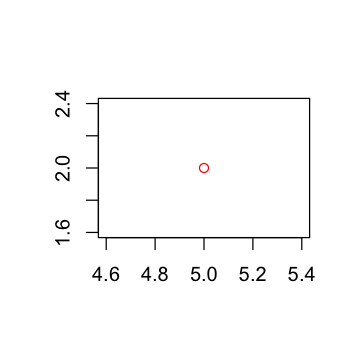

In [15]:
pt = st_point( c(5,2) )
class(pt)
pt
plot(pt,col="red")
box()
axis(1,labels=T)
axis(2,labels=T)

### LINESTRING

In [16]:
linestring_matrix = rbind( c(5,2) , c(4,6), c(2,4) )
class( linestring_matrix )

[1] "matrix"

[1] "XY"         "LINESTRING" "sfg"

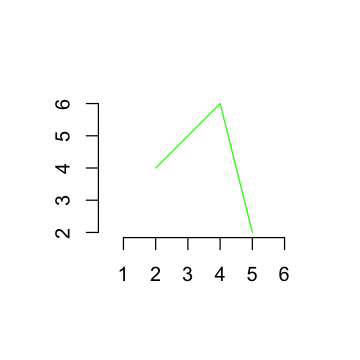

In [17]:
ln = st_linestring( linestring_matrix )
class(ln)
plot(ln,col="green")
axis(1,labels=T)
axis(2,labels=T)

### POLYGON

In [18]:
polygon_list = list(rbind( c(2,4), c(4,6), c(5,2) , c(2,4) ))
class( polygon_list )

[1] "list"

[1] "XY"      "POLYGON" "sfg"

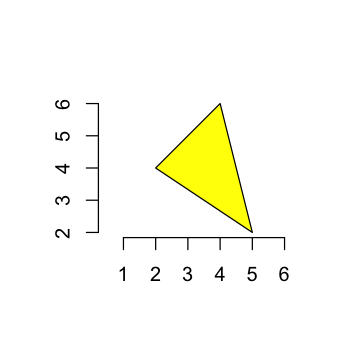

In [19]:
pg = st_polygon( polygon_list )
class(pg)
plot(pg,col="yellow")
axis(1,labels=T)
axis(2,labels=T)

### MULTIPOINT

In [20]:
multipoint_matrix = rbind( c(5,2) , c(4,6), c(2,4) )
class( multipoint_matrix )

[1] "matrix"

[1] "XY"         "MULTIPOINT" "sfg"

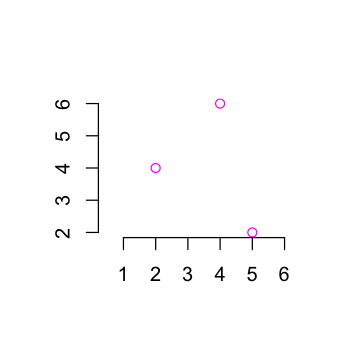

In [21]:
mp = st_multipoint( multipoint_matrix )
class(mp)
plot(mp,col="magenta")
axis(1,labels=T)
axis(2,labels=T)

### MULTILINESTRING

[1] "XY"              "MULTILINESTRING" "sfg"

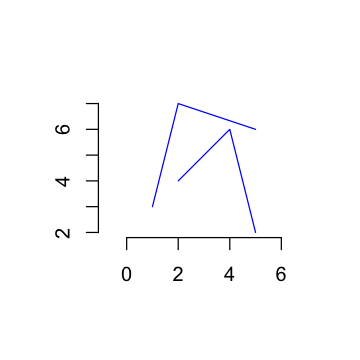

In [22]:
multilinestring_list = list( rbind( c(5,2) , c(4,6) , c(2,4) ) , 
                             rbind( c(1,3) , c(2,7) , c(5,6) ) 
                           )
mln = st_multilinestring( multilinestring_list )
class(mln)
plot(mln,col="blue")
axis(1,labels=T)
axis(2,labels=T)

### MULTIPOLYGON

In [23]:
multipolygon_list = list(list(rbind(c(1, 5), c(2, 2), c(4, 1), c(4, 4), c(1, 5))),
                         list(rbind(c(0, 2), c(1, 2), c(1, 3), c(0, 3), c(0, 2))))
class(multipolygon_list)

[1] "list"

[1] "XY"           "MULTIPOLYGON" "sfg"

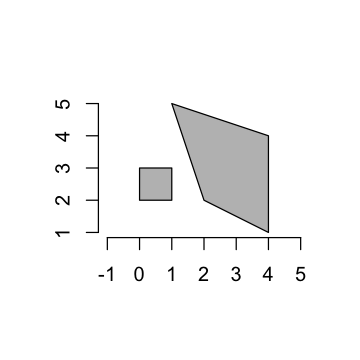

In [24]:
mpg = st_multipolygon( multipolygon_list )
class(mpg)
plot(mpg,col="gray")
axis(1,labels=T)
axis(2,labels=T)

### GEOMETRYCOLLECTION

In [25]:
multipoint_matrix = rbind(c(5, 2), c(1, 3), c(3, 4), c(3, 2))
linestring_matrix = rbind(c(1, 5), c(4, 4), c(4, 1), c(2, 2), c(3, 2))
class(multipoint_matrix)
class(linestring_matrix)

[1] "matrix"

[1] "matrix"

[1] "XY"                 "GEOMETRYCOLLECTION" "sfg"

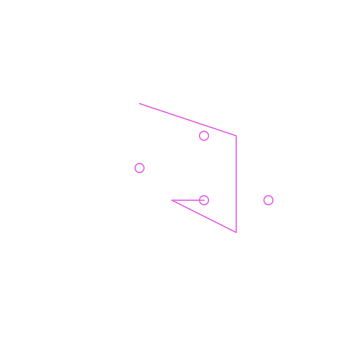

In [26]:
geometrycollection_list = list(st_multipoint(multipoint_matrix),
                              st_linestring(linestring_matrix))
gcoll = st_geometrycollection(gemetrycollection_list)
class(gcoll)
plot(gcoll,col="violet")

In [107]:
options(repr.plot.width=3, repr.plot.height=3)

## Simple features columns (sfc)
### (from geometry to geospatial obj)
One <b>sfg</b> object contains only a single simple feature geometry. <br>
A <b>simple feature geometry column</b> (<b>sfc</b>) is a list of sfg objects, which is additionally able to contain information about the coordinate reference system in use.

In [108]:
point1 = st_point(c(5, 2))
point2 = st_point(c(1, 3))
points_sfc = st_sfc(point1, point2)
print(points_sfc)

Geometry set for 2 features 
geometry type:  POINT
dimension:      XY
bbox:           xmin: 1 ymin: 2 xmax: 5 ymax: 3
epsg (SRID):    NA
proj4string:    NA


POINT (5 2)
POINT (1 3)


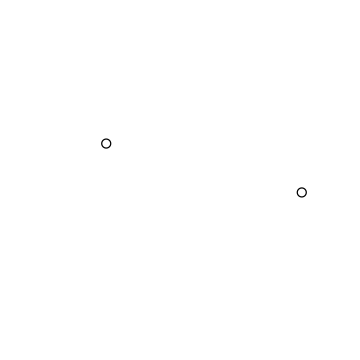

In [109]:
plot(points_sfc)

In [29]:
polygon_list1 = list(rbind(c(1, 5), c(2, 2), c(4, 1), c(4, 4), c(1, 5)))
polygon1 = st_polygon(polygon_list1)
polygon_list2 = list(rbind(c(0, 2), c(1, 2), c(1, 3), c(0, 3), c(0, 2)))
polygon2 = st_polygon(polygon_list2)
polygon_sfc = st_sfc(polygon1, polygon2)
st_geometry_type(polygon_sfc)

[1] POLYGON POLYGON
18 Levels: GEOMETRY POINT LINESTRING POLYGON MULTIPOINT ... TRIANGLE

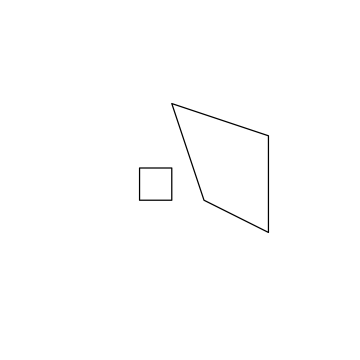

In [110]:
plot(polygon_sfc)

#### It is also possible to create an sfc object from sfg objects with different geometry types:

In [30]:
# sfc GEOMETRY
multilinestring_list1 = list(rbind(c(1, 5), c(4, 4), c(4, 1), c(2, 2), c(3, 2)), 
                            rbind(c(1, 2), c(2, 4)))
multilinestring1 = st_multilinestring((multilinestring_list1))

point_multilinestring_sfc = st_sfc(point1, multilinestring1)
st_geometry_type(point_multilinestring_sfc)

[1] POINT           MULTILINESTRING
18 Levels: GEOMETRY POINT LINESTRING POLYGON MULTIPOINT ... TRIANGLE

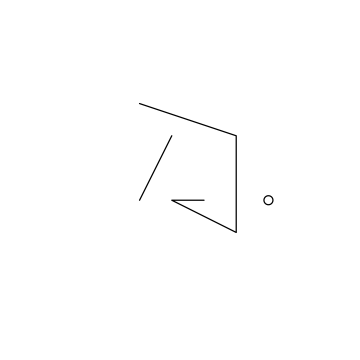

In [111]:
plot(point_multilinestring_sfc)

### CRS (Coordinate Reference System)
<b>sfc</b> objects can additionally store information on the coordinate reference systems (CRS).<br>
To specify a certain CRS, we can use the <b>epsg</b> (SRID) or <b>proj4string</b> attributes of an sfc object. <br>
The default value of epsg (SRID) and proj4string is <b>NA</b> (Not Available), as can be verified with <b>st_crs( )</b>:

In [31]:
st_crs(points_sfc)

Coordinate Reference System: NA

In [32]:
# EPSG definition
points_sfc_wgs = st_sfc(point1, point2, crs = 4326)
st_crs(points_sfc_wgs)

Coordinate Reference System:
  EPSG: 4326 
  proj4string: "+proj=longlat +datum=WGS84 +no_defs"

In [33]:
# PROJ4STRING definition
st_sfc(point1, point2, crs = "+proj=longlat +datum=WGS84 +no_defs")

POINT (5 2)
POINT (1 3)


Geometry set for 2 features 
geometry type:  POINT
dimension:      XY
bbox:           xmin: 1 ymin: 2 xmax: 5 ymax: 3
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs

## The sf class
<b>'sf geometry'</b> is purely geometric object and <b>'sf column'</b> is a geographic building block.<br>
The final building block is non-geographic attributes representing other attributed such as measured values.<br>
<b><font size=4 color="green">st_sf( )</font></b>

### Example using Climatic Ground Stations
To illustrate attributes, we will use the temperature and precipitation measured at ground weather stations.

In [112]:
require(readxl)
Tmax <- read_excel("~/work/Didattica/Agraria/GeVS/2019/esercizi/Tmax.xlsx", sheet = "R", na = "NA")
Rain <- read_excel("~/work/Didattica/Agraria/GeVS/2019/esercizi/Rainfall.xlsx", sheet = "R", na = "NA")

In [35]:
point   = st_point(c(10.91571, 44.65191))     # sfg object
geom    = st_sfc(point, crs = 4326)           # sfc object
attrib  = data.frame(                         # data.frame object
   name = "MODENAURB",
   date = as.Date(Tmax$GIORNO[1]),
   temperature = Tmax$MODENAURB[1],
   rainfall = Rain$MODENAURB[1]
)
# Simple Feature (Collection):
SF = st_sf(attrib, geometry = geom)          # sf object

In [36]:
class(point)
class(geom)
class(SF)

[1] "XY"    "POINT" "sfg"

[1] "sfc_POINT" "sfc"

[1] "sf"         "data.frame"

In [37]:
print(SF)

Simple feature collection with 1 feature and 4 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: 10.91571 ymin: 44.65191 xmax: 10.91571 ymax: 44.65191
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs
       name       date temperature rainfall                  geometry
1 MODENAURB 2007-01-01         6.5        0 POINT (10.91571 44.65191)


In [38]:
names(SF)

[1] "name"        "date"        "temperature" "rainfall"    "geometry"

In [39]:
print(SF$geometry)

Geometry set for 1 feature 
geometry type:  POINT
dimension:      XY
bbox:           xmin: 10.91571 ymin: 44.65191 xmax: 10.91571 ymax: 44.65191
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


POINT (10.91571 44.65191)


In [40]:
ER  = osmdata::getbb("Emilia Romagna",format_out="sf_polygon") # => polygon
#ER  = osmdata::getbb("Emilia Romagna") # => square Bounding Box

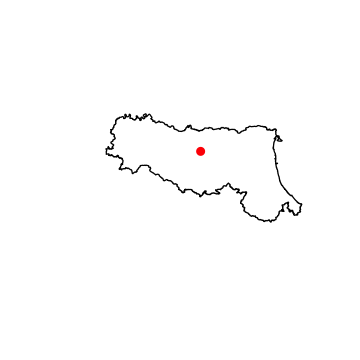

In [41]:
plot(ER$geometry,reset=F)
plot(SF$geometry,add=T,pch=16,col="red")

In [42]:
point   = st_point(c(11.1987, 44.48924))        # sfg object
geom    = st_sfc(point, crs = 4326)             # sfc object
attrib  = data.frame(                           # data.frame object
   name = names(Tmax)[4],
   date = as.Date(Tmax$GIORNO[1]),
   temperature = Tmax$ZOLAPREDOSAAGRO[1],
   rainfall = Rain$ZOLAPREDOSAAGRO[1]
)
# Simple Feature Collection:
SF = rbind(SF,st_sf(attrib, geometry = geom)) # sf object

In [43]:
print(SF)

Simple feature collection with 2 features and 4 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: 10.91571 ymin: 44.48924 xmax: 11.1987 ymax: 44.65191
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs
             name       date temperature rainfall                  geometry
1       MODENAURB 2007-01-01         6.5        0 POINT (10.91571 44.65191)
2 ZOLAPREDOSAAGRO 2007-01-01         8.4        0  POINT (11.1987 44.48924)


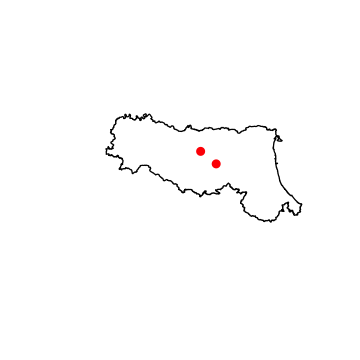

In [44]:
plot(ER$geometry,reset=F)
plot(SF$geometry,add=T,pch=16,col="red")

### Example using world data

In [114]:
options(repr.plot.width=5, repr.plot.height=5)

In [57]:
data(world)
names(world)

[1] "iso_a2"    "name_long" "continent" "region_un" "subregion" "type"     
 [7] "area_km2"  "pop"       "lifeExp"   "gdpPercap" "geom"

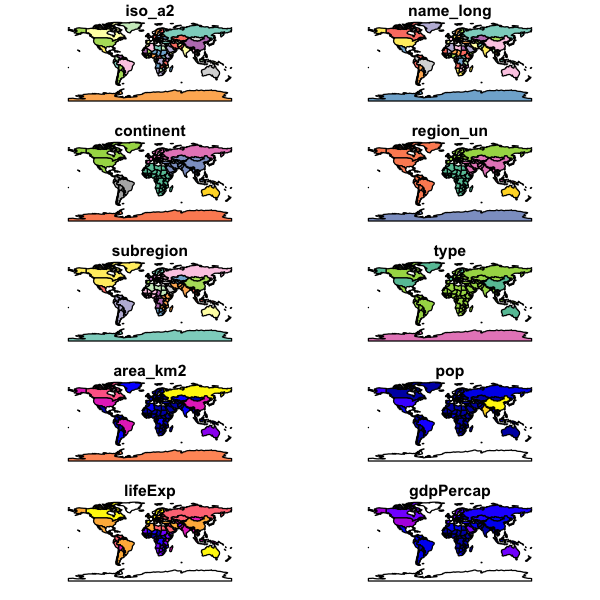

In [58]:
plot(world)

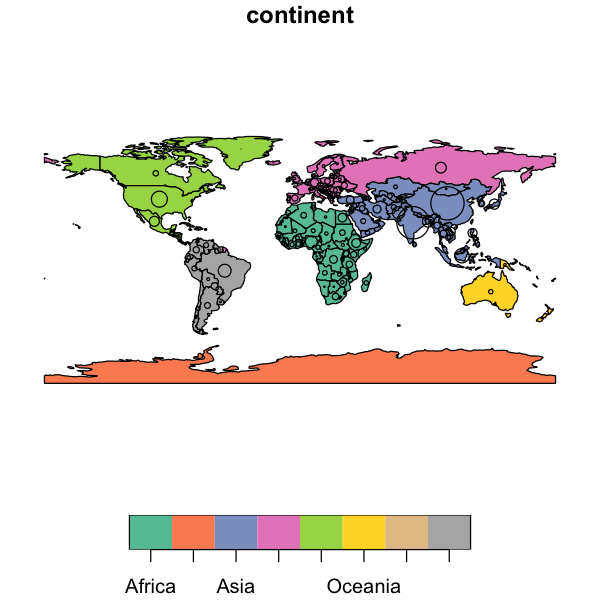

In [115]:
options(warn=-1)
plot(world["continent"], reset = FALSE)
siz = sqrt(world$pop) / 10000
world_cents = st_centroid(world, of_largest_polygon = TRUE)
plot(st_geometry(world_cents), add = TRUE, cex = siz)

In [59]:
summary(world["lifeExp"])

    lifeExp                 geom    
 Min.   :50.62   MULTIPOLYGON :177  
 1st Qu.:64.96   epsg:4326    :  0  
 Median :72.87   +proj=long...:  0  
 Mean   :70.85                      
 3rd Qu.:76.78                      
 Max.   :83.59                      
 NA's   :10                         

In [60]:
world_asia = world[world$continent == "Asia", ]

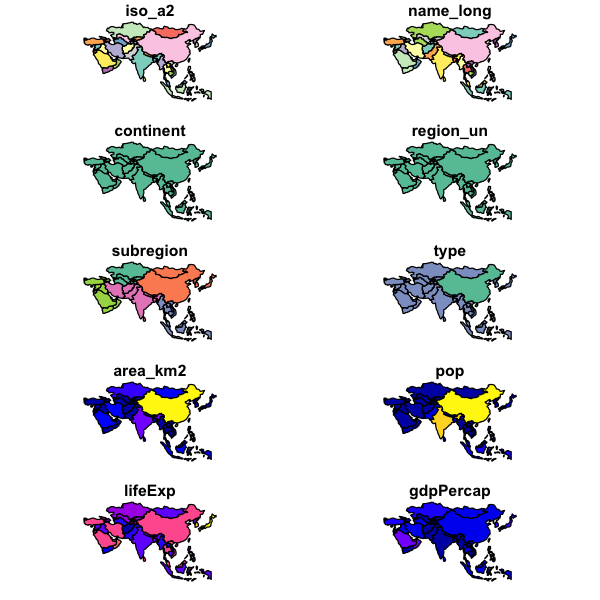

In [61]:
plot(world_asia)

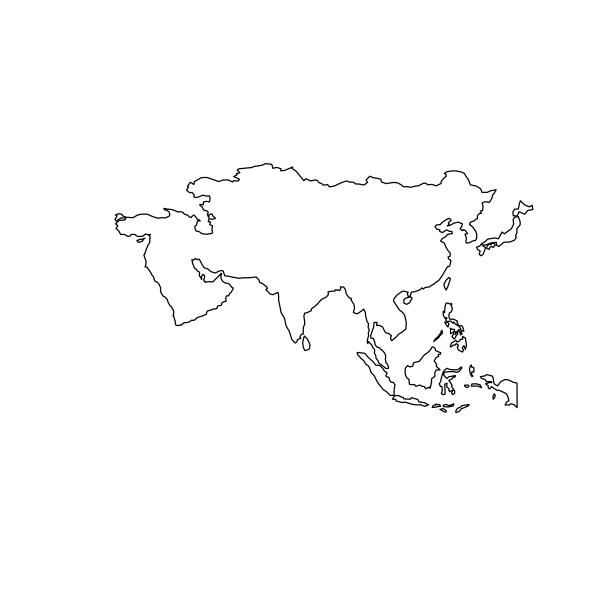

In [62]:
asia = st_union(world_asia)
plot(asia)

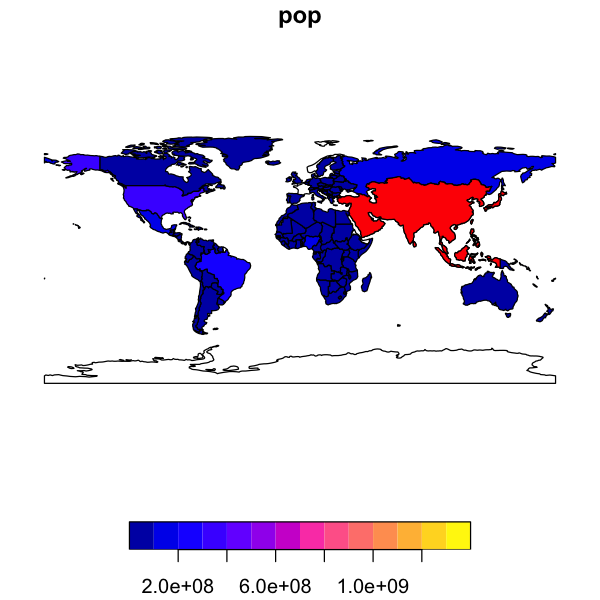

In [63]:
plot(world["pop"], reset = FALSE)
plot(asia, add = TRUE, col = "red")

### Example importing shapefile

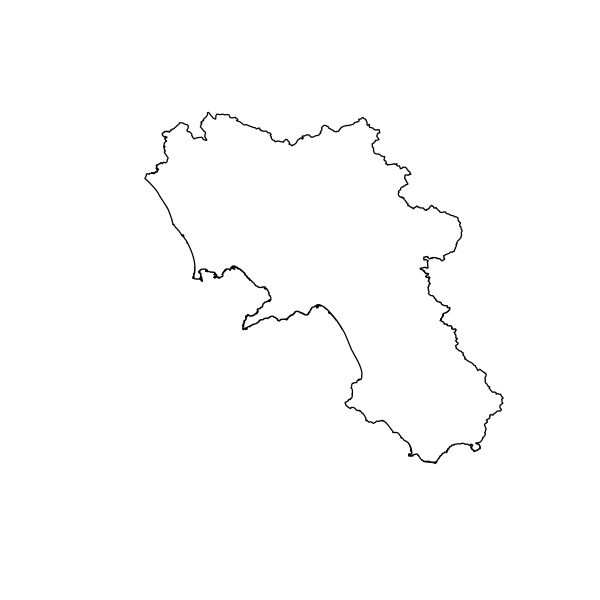

In [93]:
Ca = osmdata::getbb("Campania", format_out = "sf_polygon")
plot(Ca)

In [70]:
carta_pedologica_VT = "~/work/Didattica/Agraria/GeVS/2019/esercizi/07_Carta_Pedologica/Carta_pedologica.shp"
VT = st_read( carta_pedologica_VT )

Reading layer `Carta_pedologica' from data source `/Users/giuliano/work/Didattica/Agraria/GeVS/2019/esercizi/07_Carta_Pedologica/Carta_pedologica.shp' using driver `ESRI Shapefile'
Simple feature collection with 208 features and 6 fields
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: 453229.8 ymin: 4556062 xmax: 476902.4 ymax: 4572168
epsg (SRID):    32633
proj4string:    +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs


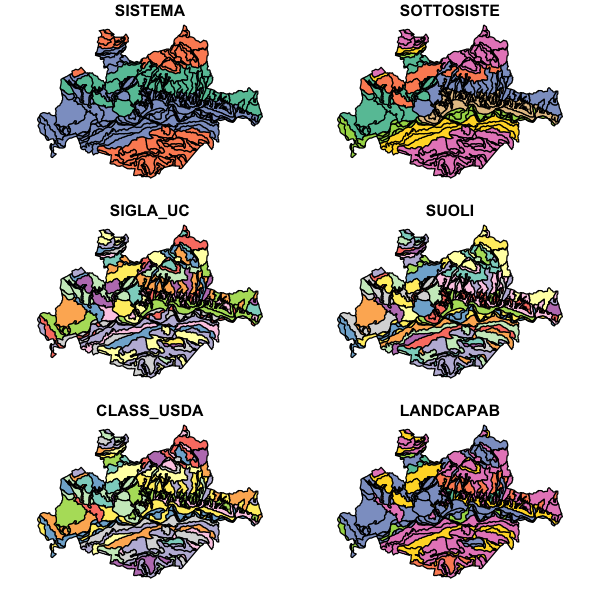

In [71]:
plot(VT)

In [94]:
st_crs(Ca)

Coordinate Reference System:
  EPSG: 4326 
  proj4string: "+proj=longlat +datum=WGS84 +no_defs"

In [95]:
st_crs(VT)

Coordinate Reference System:
  EPSG: 32633 
  proj4string: "+proj=utm +zone=33 +datum=WGS84 +units=m +no_defs"

In [96]:
Ca_proj = st_transform(Ca, 32633)
st_crs(Ca_proj)

Coordinate Reference System:
  EPSG: 32633 
  proj4string: "+proj=utm +zone=33 +datum=WGS84 +units=m +no_defs"

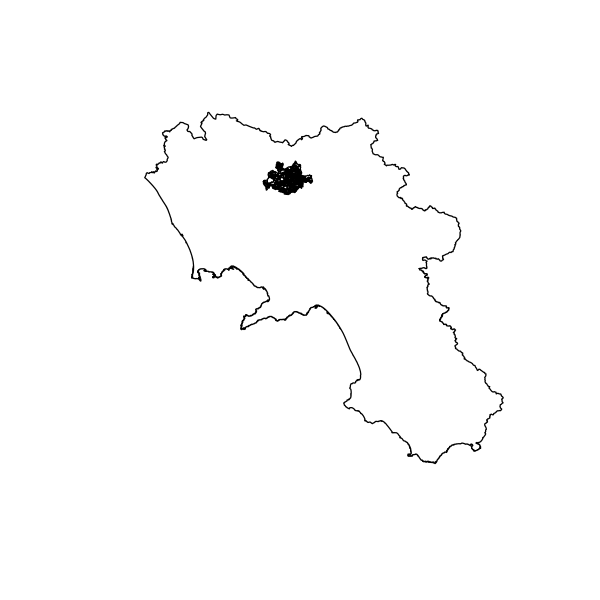

In [97]:
plot(Ca_proj,reset=F)
plot(st_geometry(VT),add=T)